In [ ]:
# Here we load the data folder in the sharedrives
# The data folder is in the 'drive/Shareddrives/Ada'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Downgrade the pandas version so that we can read data in chunksize

In [ ]:
pip install pandas==1.0.5


     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.


Import library

In [ ]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import warnings
import pickle
import shutil
import os
import glob
import wordcloud
import nltk
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import sys
import spacy
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
#from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
# The original datafile path, contains all the Quote from 2015-2020
##dataset_path='/content/drive/Shareddrives/Ada/Quotebank'

# The path store the first preprocessed Pickles 
#pickle_path='/content/drive/Shareddrives/Ada/pickle'

# Specify which cols to drop and which to keep
#use_cols=["qids","quoteID","quotation","speaker","date","numOccurrences","probas","urls","phase"]
#ignore_cols=[]

# The chunk_size for the pickles
#chunk_size = 600000 

In [ ]:
# here if you want to remove the pickles and try to make new pickles
# shutil.rmtree(pickle_path)
# os.mkdir(pickle_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Here check if we already process data and save them into pickles
# If not process them into pickles
#if not os.listdir(pickle_path):
   # for name in glob.glob(dataset_path + "/*.bz2"):
   #   print("pickling "+name)
   #   pickle_name=name.split('/')[6].split('.')[0]
   #   reader = pd.read_json(name, chunksize=chunk_size, lines=True, compression='bz2')   
   #   for i, chunk in enumerate(reader):
   #     chunk=chunk[use_cols]
   #     out_file = pickle_path + "/"+ pickle_name + "_{}.pkl".format(i+1)
   #     with open(out_file, "wb") as f:
   #         pickle.dump(chunk,f,pickle.HIGHEST_PROTOCOL)
   #     chunk=""    
  #  print('Pickles made!,ready to go!')       
#else:    
 #   print("Already processed data into pickles, you can use them right away!")

Already processed data into pickles, you can use them right away!


In [ ]:

# Here is an example how to filter the pickles and try to get useful informations
# Where we store the processed pickle
#processed_path='/content/drive/Shareddrives/Ada/processed' 
#out_file = processed_path + "/"+"Brexit_related_quote.pkl"


# not os.path.exists(out_file):
  # Specify the orginal pickles we want to process
  # which are in the pickle folder
  #data_p_files=[]
  #for name in glob.glob(pickle_path + "/*.pkl"):
   # data_p_files.append(name)

  # Here is the key words we want to filter in the quotations
 # searchfor = ['Brexit','European Union','Theresa May', 'David Cameroun', 'Boris Johnson', 'backstop',
  #             'Prime minister', 'no deal', 'UK', 'EU', 'transition period']
  
  # Add all the df into here and store it into pickle in the end
# appended_data=[]
# for i in range(len(data_p_files)):
#   print("processing"+data_p_files[i])
#   df=pd.read_pickle(data_p_files[i])
#   # Filter quotations only in phase E
#   df=df.loc[df['phase']=='E']
#   df=df.loc[df['speaker']!='None']
#   # Filter quotations only relevant to Brexit or both UK and EU firtsly
#   df=df.loc[df['quotation'].str.contains('Brexit|UK.*EU|EU.*UK|United Kingdom.*European Union|European Union.*United Kingdom|British.*EU|EU.*British',case = False)]
#   # Define key words relevant to Brexit to filter related news from the quotations that only relevant to UK and EU 
#   searchfor = ['brexit','leave campaign and remain campaign','no deal', 'transition period','leave','withdral','referendum', 'split from']
#   # Filter news relevant to some keywords
#   df=df.loc[df['quotation'].str.contains('|'.join(searchfor),case = False)]

#   appended_data.append(df)
#   # release the df at the end of process
#   # To free the memory
#   df = ""  
  
  # concat and append
  #appended_data = pd.concat(appended_data)
  #appended_data.to_pickle(out_file)
#else:    
 #   print("Already processed data into pickle, you can use them right away!")

Already processed data into pickle, you can use them right away!


In [ ]:
#Here we 

all_pickle_path='/content/drive/Shareddrives/Ada/processed/All_attribute.pkl'
if not os.path.exists(all_attribute_pickle_path):
  parquet_path='/content/drive/Shareddrives/Ada/Project datasets/speaker_attributes.parquet'
  label_path='/content/drive/Shareddrives/Ada/Project datasets/wikidata_labels_descriptions_quotebank.csv.bz2'
  df=pd.read_pickle('/content/drive/Shareddrives/Ada/processed/Brexit_related_quote.pkl')
  df=df.loc[df['speaker']!='None']
  df['qids']=df['qids'].map(lambda x:str(x[0]))
  df.rename(columns={"qids":"id"},inplace=True)
  parquet_cols=['id','label','date_of_birth','nationality','gender','ethnic_group','occupation','party','academic_degree','religion']

  for name in glob.glob(parquet_path + "/*.parquet"):
    par=pd.read_parquet(name)
    par=par[parquet_cols]
    #see if we already merge
    if 'gender' not in df.columns:
      df = pd.merge(df, par,on='id',how='left')
    else:
      df=df.set_index('id')
      df.update(par.set_index('id'))
      df.reset_index(inplace=True)

  df = df.fillna('0')
  cols=['nationality','gender','ethnic_group','occupation','party','academic_degree','religion']

  for col in cols:
    df[col]=df[col].map(lambda x: x[0])

  df_label=pd.read_csv(label_path,compression='bz2',index_col='QID')
  for col in cols:
    df[col]=df[col].map(lambda x: df_label.loc[x]['Label'] if x in df_label.index else x)
  df.to_pickle(all_attribute_pickle_path)

In [ ]:
df=pd.read_pickle('/content/drive/Shareddrives/Ada/processed/Brexit_related_quote.pkl')
df.head(5)

,qids,quoteID,quotation,speaker,probas,date,numOccurrences,urls,phase
232,[Q20251661],2020-01-31-011304,Brexit is the victory of the common people aga...,Laura Huhtasaari,"[[Laura Huhtasaari, 0.9325], [None, 0.059], [P...",2020-01-31 03:25:04,1,[http://voanews.com/europe/shrug-and-some-sorr...,E
2828,[Q694676],2020-02-13-014393,Certainly Brexit was a big issue and people we...,Pat McFadden,"[[Pat McFadden, 0.9371], [None, 0.0535], [Jere...",2020-02-13 06:01:30,1,[http://www.expressandstar.com/news/politics/2...,E
3153,"[Q1341937, Q16211383, Q694825]",2020-03-08-010480,"I backed leave and voted leave, but I never ca...",Jason McCartney,"[[Jason McCartney, 0.8274], [None, 0.128], [Li...",2020-03-08 05:45:58,1,[http://www.yorkshirepost.co.uk/news/second-ti...,E
3776,[Q6837191],2020-02-14-058019,"legacy, bad faith on pensions, Brexit and poli...",Michelle O'Neill,"[[Michelle O'Neill, 0.8055], [None, 0.1302], [...",2020-02-14 11:48:49,1,[https://www.belfasttelegraph.co.uk/news/north...,E
4886,[Q1728820],2020-01-27-094916,"we're only at half-time on Brexit, it's not do...",Leo Varadkar,"[[Leo Varadkar, 0.9378], [None, 0.0502], [Bori...",2020-01-27 12:25:00,1,[http://blogs.independent.co.uk/voices/brexit-...,E


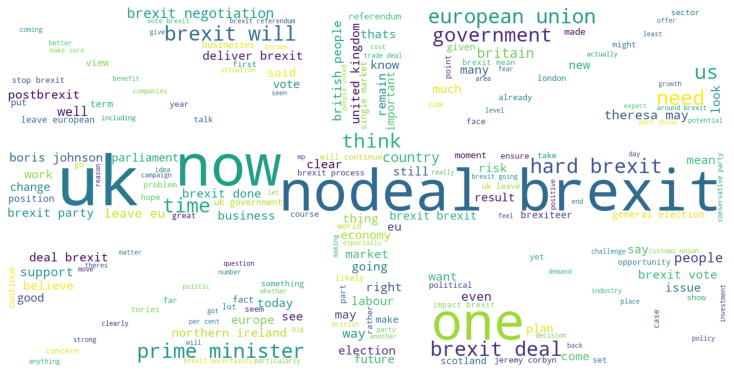

In [ ]:
#Create word cloud using the latest pickle 'processed/Brexit_related_quote.pkl'
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import string
quotation_words = ''
stopwords = set(STOPWORDS) 
qute_txt='/content/drive/Shareddrives/Ada/processed/qutos.txt'

if not os.path.exists(qute_txt):
  with open(qute_txt,"w+") as f:
    # iterate through the csv file 
    for val in df.quotation: 
      # typecaste each val to string 
      val = str(val)
      for c in string.punctuation:
        val = val.replace(c,'') 
      # split the value 
      tokens = val.split() 
      #Converts each token into lowercase 
      for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
      for words in tokens: 
        f.write(str(words)+ '\n')
  f.close()

quotation_words=open (qute_txt).read()
mask = np.array(Image.open('/content/drive/Shareddrives/Ada/img/Flag_of_the_United_Kingdom.png'))
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            mask=mask,
            stopwords = stopwords, 
            min_font_size = 10).generate(quotation_words) 

# plot the WordCloud image                        
plt.figure(figsize = (10, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
## stop words 

In [ ]:
pip install textblob

In [ ]:
# sentimental analysis
from textblob import TextBlob
if 'polarity' not in df.columns:
  df.insert(df.shape[1],'polarity','None')
def polarity_to_text(blob):
      if (blob.sentiment.polarity > 0.1):
        #'Polarity is positive 😊'
          return 'postive'
      elif(blob.sentiment.polarity <= 0.1 and  blob.sentiment.polarity >= -0.1):
          # 'Polarity is neutral 😐'
          return 'neutral'
      else:
        # 'Polarity is negative 😡' 
          return 'negative'


if df.iloc[1].polarity=="None":
  for i,data in df.iterrows():
    blob = TextBlob(data.quotation)
    emotion=polarity_to_text(blob)
    df.set_value(i,'polarity',emotion)

plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="polarity", data=df,palette="Set3")
plt.show()

AttributeError: ignored

In [ ]:
import re

In [ ]:
# Remove punctuation
df['quotation_processed'] = \
df["quotation"].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['quotation_processed'] = \
df['quotation_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['quotation_processed'].head()

In [ ]:
# compare with the old word cloud to see if the processing did smt
# dont think it will add much since the processing is already done
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import string
quotation_words = ''
stopwords = set(STOPWORDS) 
qute_txt='/content/drive/Shareddrives/Ada/processed/qutos_trial_lda.txt'

if not os.path.exists(qute_txt):
  with open(qute_txt,"w+") as f:
    # iterate through the csv file 
    for val in df.quotation_processed: 
      # typecaste each val to string 
      val = str(val)
      for c in string.punctuation:
        val = val.replace(c,'') 
      # split the value 
      tokens = val.split() 
      #Converts each token into lowercase 
      for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
      for words in tokens: 
        f.write(str(words)+ '\n')
  f.close()

quotation_words=open (qute_txt).read()
mask = np.array(Image.open('/content/drive/Shareddrives/Ada/img/Flag_of_the_United_Kingdom.png'))
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            mask=mask,
            stopwords = stopwords, 
            min_font_size = 10).generate(quotation_words) 

# plot the WordCloud image                        
plt.figure(figsize = (10, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
## stop words

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['thats', 'one', 'let', 'put', 'lot','mean'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.quotation_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

LDA model training

In [ ]:
from pprint import pprint
# number of topics
num_topics = 15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

Using N-gram to find subject

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!


In [ ]:
lda_model

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

# 1.filter and preprocessing data (J) done!
# 2.have new pickles(J) done!
# 3.Add their professions(M)
# 4.Add their company (M)
# 5.use api to classify their sentiment https://komprehend.io/sentiment-analysis (Z maybe J) 
# 6.descriptive plots
## a. Across time
## b. Major events
## c. Most frequent word in that time
## d. 
## 7. LDA (Z)

## theresa may, david cameroun, boris johnson, backstop, Prime minister, no deal, UK, EU, transition period

## 2015 ( era before brexit)
## 23/6/2016: uk votes to leave
## 13/7/2016: change of prime minister Cameroun to may
## 23/6/2017: trigger warning, 2 years countdown
## 8/12/2017 to 25/11/2018: backstop
## 24/6/2019 : may resigns
## 24/7/2019: boris is pm
## 2/10/2019: brexit deal 
## 12/12/2019: election day
## 31/01/2020- 16/10/2020: departed, discusion the deal/ no deal exit

# New Section

**Mahdi is working in here :)**

In [ ]:
df.head()

,qids,quoteID,quotation,speaker,probas,date,numOccurrences,urls,phase
232,[Q20251661],2020-01-31-011304,Brexit is the victory of the common people aga...,Laura Huhtasaari,"[[Laura Huhtasaari, 0.9325], [None, 0.059], [P...",2020-01-31 03:25:04,1,[http://voanews.com/europe/shrug-and-some-sorr...,E
2828,[Q694676],2020-02-13-014393,Certainly Brexit was a big issue and people we...,Pat McFadden,"[[Pat McFadden, 0.9371], [None, 0.0535], [Jere...",2020-02-13 06:01:30,1,[http://www.expressandstar.com/news/politics/2...,E
3153,"[Q1341937, Q16211383, Q694825]",2020-03-08-010480,"I backed leave and voted leave, but I never ca...",Jason McCartney,"[[Jason McCartney, 0.8274], [None, 0.128], [Li...",2020-03-08 05:45:58,1,[http://www.yorkshirepost.co.uk/news/second-ti...,E
3776,[Q6837191],2020-02-14-058019,"legacy, bad faith on pensions, Brexit and poli...",Michelle O'Neill,"[[Michelle O'Neill, 0.8055], [None, 0.1302], [...",2020-02-14 11:48:49,1,[https://www.belfasttelegraph.co.uk/news/north...,E
4886,[Q1728820],2020-01-27-094916,"we're only at half-time on Brexit, it's not do...",Leo Varadkar,"[[Leo Varadkar, 0.9378], [None, 0.0502], [Bori...",2020-01-27 12:25:00,1,[http://blogs.independent.co.uk/voices/brexit-...,E


**Adding the name of the domain (taking it from the url)**

In [ ]:
#Testing
from urllib.parse import urlparse
list_domains = []
for url in df.iloc[3776].urls:
  list_domains.append(urlparse(url).netloc)

list_domains

['www.mirror.co.uk', 'www.liverpoolecho.co.uk']

In [ ]:
#Function tp change urls to domains
def function(row):
  list_domains = []
  for url in row:
    list_domains.append(urlparse(url).netloc)
  return list_domains

df['domains'] = df['urls'].apply(function)
df

,qids,quoteID,quotation,speaker,probas,date,numOccurrences,urls,phase,domains
232,[Q20251661],2020-01-31-011304,Brexit is the victory of the common people aga...,Laura Huhtasaari,"[[Laura Huhtasaari, 0.9325], [None, 0.059], [P...",2020-01-31 03:25:04,1,[http://voanews.com/europe/shrug-and-some-sorr...,E,[voanews.com]
2828,[Q694676],2020-02-13-014393,Certainly Brexit was a big issue and people we...,Pat McFadden,"[[Pat McFadden, 0.9371], [None, 0.0535], [Jere...",2020-02-13 06:01:30,1,[http://www.expressandstar.com/news/politics/2...,E,[www.expressandstar.com]
3153,"[Q1341937, Q16211383, Q694825]",2020-03-08-010480,"I backed leave and voted leave, but I never ca...",Jason McCartney,"[[Jason McCartney, 0.8274], [None, 0.128], [Li...",2020-03-08 05:45:58,1,[http://www.yorkshirepost.co.uk/news/second-ti...,E,[www.yorkshirepost.co.uk]
3776,[Q6837191],2020-02-14-058019,"legacy, bad faith on pensions, Brexit and poli...",Michelle O'Neill,"[[Michelle O'Neill, 0.8055], [None, 0.1302], [...",2020-02-14 11:48:49,1,[https://www.belfasttelegraph.co.uk/news/north...,E,[www.belfasttelegraph.co.uk]
4886,[Q1728820],2020-01-27-094916,"we're only at half-time on Brexit, it's not do...",Leo Varadkar,"[[Leo Varadkar, 0.9378], [None, 0.0502], [Bori...",2020-01-27 12:25:00,1,[http://blogs.independent.co.uk/voices/brexit-...,E,[blogs.independent.co.uk]
...,...,...,...,...,...,...,...,...,...,...
20699374,[Q567],2015-10-07-001521,a Brexit now [ look ] more likely,Angela Merkel,"[[Angela Merkel, 0.5723], [Francois Hollande, ...",2015-10-07 07:54:43,1,[http://breitbart.com/london/2015/10/07/farage...,E,[breitbart.com]
20708455,[Q1395663],2015-03-10-096295,We saw strong growth in the UK last year but I...,Sir Martin Sorrell,"[[Sir Martin Sorrell, 0.8715], [None, 0.1285]]",2015-03-10 00:51:18,1,[http://independent.co.uk/news/business/news/w...,E,[independent.co.uk]
20728876,[Q23769958],2015-10-09-130507,We look forward to supporting their push to pe...,Richard Tice,"[[Richard Tice, 0.9685], [None, 0.0262], [Davi...",2015-10-09 07:29:35,5,[http://feeds.theguardian.com/c/34708/f/663865...,E,"[feeds.theguardian.com, feeds.theguardian.com,..."
20775049,[Q503143],2015-08-24-049253,"It would be a travesty to both, for Europe and...",Alexander Stubb,"[[Alexander Stubb, 0.9019], [None, 0.0783], [G...",2015-08-24 11:37:42,7,[http://af.reuters.com/article/worldNews/idAFK...,E,"[af.reuters.com, uk.news.yahoo.com, www.channe..."


In [ ]:
#Let's get the list of all domains and analyse them
list_domains = df['domains'].to_list()
flat_list_of_domains = [item for sublist in list_domains for item in sublist]

In [ ]:
set_unique_domains = set(flat_list_of_domains)

In [ ]:
len(set_unique_domains)

6382

In [ ]:
flat_list_of_domains.count('independent.co.uk')

263

In [ ]:
list_domains_occurences = []
for domain in set_unique_domains:
  list_domains_occurences.append([domain, flat_list_of_domains.count(domain)])

In [ ]:
len(list_domains_occurences)

6382

In [ ]:
sorted_list_domains_occurences = sorted(list_domains_occurences, key=lambda x: x[1], reverse=True)

In [ ]:
sorted_list_domains_occurences[0:5]

[['www.belfasttelegraph.co.uk', 6419],
 ['www.msn.com', 5989],
 ['express.co.uk', 5748],
 ['heraldscotland.com', 4728],
 ['www.wandsworthguardian.co.uk', 4601]]

In [ ]:
df_domains = pd.DataFrame.from_records(sorted_list_domains_occurences)

In [ ]:
df_domains.head(10)

,0,1
0,www.belfasttelegraph.co.uk,6419
1,www.msn.com,5989
2,express.co.uk,5748
3,heraldscotland.com,4728
4,www.wandsworthguardian.co.uk,4601
5,www.thetelegraphandargus.co.uk,4449
6,www.ealingtimes.co.uk,4308
7,www.croydonguardian.co.uk,4230
8,www.middevonstar.co.uk,4227
9,www.thenorthernecho.co.uk,4178


In [ ]:
df_domains.set_axis(['domain', 'frequency'], axis=1, inplace=True)

**Let's add percentages**

In [ ]:
df_domains['percentages'] = df_domains['frequency'].apply(lambda x: x / df.shape[0])

In [ ]:
df_domains

,domain,frequency,percentages
0,www.belfasttelegraph.co.uk,6419,0.063007
1,www.msn.com,5989,0.058786
2,express.co.uk,5748,0.056420
3,heraldscotland.com,4728,0.046408
4,www.wandsworthguardian.co.uk,4601,0.045162
...,...,...,...
6377,www.webmd.boots.com,1,0.000010
6378,www.wallstreetdaily.com,1,0.000010
6379,redresurgence.wordpress.com,1,0.000010
6380,www.crowdfundinsider.com,1,0.000010


**Most invested domains**

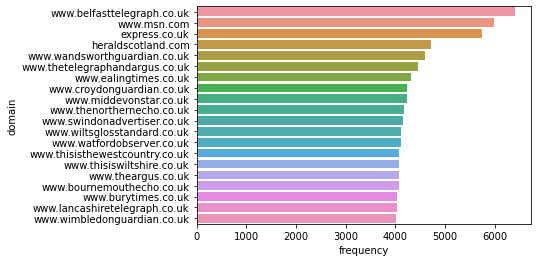

In [ ]:
import matplotlib.pyplot as plt
ax = sns.barplot(x="frequency", y="domain", data=df_domains.head(20))

**Let's now check the country of these domains**

In [ ]:
#Let's add the csv file of all domains with the corresponding countries
df_domain_country = pd.read_csv('/content/drive/Shareddrives/Ada/top-level-domain-names/country-codes-tlds.csv')

In [ ]:
df_domain_country.rename(columns={' tld': 'tld'}, inplace=True)

In [ ]:
df_domain_country['tld'] = df_domain_country['tld'].str.strip()


In [ ]:
df_domain_country.head()

,country,tld
0,Afghanistan,.af
1,Åland,.ax
2,Albania,.al
3,Algeria,.dz
4,American Samoa,.as


In [ ]:
df_domain_country[df_domain_country['tld']=='.af']

,country,tld
0,Afghanistan,.af


DEPENDENT OR OR NOT, COUNTRY

**Add the country of the domain name**

In [ ]:
for index, row in df_domains.iterrows():
  row['domain country'] = df_domain_country.loc[df_domain_country['B'] == row['domain country'], 'A'].iloc[0]